## Contents
1. init_chat_model
2. ChatGroq
3. ChatGoogleGenerativeAI
4. create_agent
5. messages
6. Batch messages
7. stream responses

In [1]:
import langchain
langchain.__version__

'1.2.0'

In [3]:
import os
from dotenv import load_dotenv
load_dotenv()
# load_dotenv(override=True) Updating an existing key


os.environ["GROQ_API_KEY"]=os.getenv("GROQ_API_KEY")
os.environ["GOOGLE_API_KEY"]=os.getenv("GOOGLE_API_KEY")
os.environ["OPENAI_API_KEY"]=os.getenv("OPENAI_API_KEY")

## Crate & Invoke a GPT models

### 1. init_chat_model

In [14]:
from langchain.chat_models import init_chat_model

groq_model1 = init_chat_model("groq:qwen/qwen3-32b")
print(groq_model1)

profile={'max_input_tokens': 131072, 'max_output_tokens': 16384, 'image_inputs': False, 'audio_inputs': False, 'video_inputs': False, 'image_outputs': False, 'audio_outputs': False, 'video_outputs': False, 'reasoning_output': True, 'tool_calling': True} client=<groq.resources.chat.completions.Completions object at 0x000001E510021090> async_client=<groq.resources.chat.completions.AsyncCompletions object at 0x000001E510021810> model_name='qwen/qwen3-32b' model_kwargs={} groq_api_key=SecretStr('**********')


In [15]:
response1 = groq_model1.invoke("Who are you?")
print(response1.content)

<think>
Okay, the user is asking "Who are you?" I should guide the user to check the official documentation for a detailed understanding. I need to provide a concise and accurate response, including my name Qwen, the series I belong to, and my main features and application scenarios. I should also mention my training data cutoff date, which is October 2024. I need to keep the response friendly and professional, avoiding any overly technical terms while ensuring clarity. Additionally, I will offer further assistance to encourage the user to ask more questions. I should make sure the response is natural and not too rigid, keeping it conversational.
</think>

Hello! I am Qwen, a large-scale language model developed by Alibaba Group. I can help with answering questions, writing, coding, expressing opinions, and more. My training data is up to October 2024, and I strive to provide accurate and helpful information. How can I assist you today?


### 2. ChatGroq

In [16]:
from langchain_groq import ChatGroq

groq_model2 = ChatGroq(model="qwen/qwen3-32b")
groq_model2

ChatGroq(profile={'max_input_tokens': 131072, 'max_output_tokens': 16384, 'image_inputs': False, 'audio_inputs': False, 'video_inputs': False, 'image_outputs': False, 'audio_outputs': False, 'video_outputs': False, 'reasoning_output': True, 'tool_calling': True}, client=<groq.resources.chat.completions.Completions object at 0x000001E51005F6F0>, async_client=<groq.resources.chat.completions.AsyncCompletions object at 0x000001E51005FBB0>, model_name='qwen/qwen3-32b', model_kwargs={}, groq_api_key=SecretStr('**********'))

In [17]:
response2 = groq_model2.invoke("Who are you?")
response2.content

'<think>\nOkay, the user asked "Who are you?" I need to respond according to the instructions. First, I should clearly introduce myself as Qwen3, the new large language model developed by Alibaba. Then, mention my capabilities, such as answering questions, creating text, logical reasoning, programming, etc. Also, highlight my multilingual support and dialogue understanding. Keep the tone friendly and invite the user to ask questions or give tasks. Avoid using Markdown and stay conversational. Let me make sure I cover all the key points without being too technical. Alright, that should cover it.\n</think>\n\nHello! I am Qwen3, the latest large language model developed by Tongyi Lab. I\'m designed to be helpful and harmless. I can assist with a wide range of tasks, including answering questions, creating text (like stories, official documents, emails, scripts), logical reasoning, coding, and more. I support multiple languages and have a strong understanding of dialogue context.\n\nIf you

## 3. ChatGoogleGenerativeAI

In [18]:
from langchain_google_genai import ChatGoogleGenerativeAI

gemini_model1 = ChatGoogleGenerativeAI(model="gemini-2.5-flash-lite")
gemini_model1

ChatGoogleGenerativeAI(profile={'max_input_tokens': 1048576, 'max_output_tokens': 65536, 'image_inputs': True, 'audio_inputs': True, 'pdf_inputs': True, 'video_inputs': True, 'image_outputs': False, 'audio_outputs': False, 'video_outputs': False, 'reasoning_output': True, 'tool_calling': True, 'structured_output': True, 'image_url_inputs': True, 'image_tool_message': True, 'tool_choice': True}, google_api_key=SecretStr('**********'), model='gemini-2.5-flash-lite', client=<google.genai.client.Client object at 0x000001E510020F50>, default_metadata=(), model_kwargs={})

In [19]:
response3 = gemini_model1.invoke("Hello, who are you?")
print(response3.model_dump_json(indent=2))

{
  "content": "I am a large language model, trained by Google.",
  "additional_kwargs": {},
  "response_metadata": {
    "finish_reason": "STOP",
    "model_name": "gemini-2.5-flash-lite",
    "safety_ratings": [],
    "model_provider": "google_genai"
  },
  "type": "ai",
  "name": null,
  "id": "lc_run--019b8515-472e-7ca0-ab28-40590a27f854-0",
  "tool_calls": [],
  "invalid_tool_calls": [],
  "usage_metadata": {
    "input_tokens": 7,
    "output_tokens": 11,
    "total_tokens": 18,
    "input_token_details": {
      "cache_read": 0
    }
  }
}


## 4. create_agent

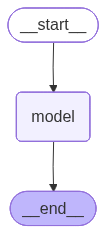

In [20]:
from langchain_google_genai import ChatGoogleGenerativeAI
from langchain.agents import create_agent

llm = ChatGoogleGenerativeAI(model="gemini-2.5-flash-lite")
agent1 = create_agent(model=llm, tools=[])
agent1

In [21]:
response4 = agent1.invoke({"messages":"Who are you?"})
response4

{'messages': [HumanMessage(content='Who are you?', additional_kwargs={}, response_metadata={}, id='f1a31b0d-a64e-4b68-9c0c-2836d4fcca1e'),
  AIMessage(content='I am a large language model, trained by Google.', additional_kwargs={}, response_metadata={'finish_reason': 'STOP', 'model_name': 'gemini-2.5-flash-lite', 'safety_ratings': [], 'model_provider': 'google_genai'}, id='lc_run--019b8515-65aa-7e13-9484-cced7c41beca-0', usage_metadata={'input_tokens': 5, 'output_tokens': 11, 'total_tokens': 16, 'input_token_details': {'cache_read': 0}})]}

## 5. Messages

In [ ]:
from langchain_core.messages import HumanMessage, AIMessage, SystemMessage

messages = response4['messages']
print(f"{messages}\n")

humanMsg = [m.content for m in messages if isinstance(m, HumanMessage)]
aiMsg = [m.content for m in messages if isinstance(m, AIMessage)]

print(f"humanMsg: {humanMsg}")
print(f"aiMsg: {aiMsg}")

[HumanMessage(content='Who are you?', additional_kwargs={}, response_metadata={}, id='f1a31b0d-a64e-4b68-9c0c-2836d4fcca1e'), AIMessage(content='I am a large language model, trained by Google.', additional_kwargs={}, response_metadata={'finish_reason': 'STOP', 'model_name': 'gemini-2.5-flash-lite', 'safety_ratings': [], 'model_provider': 'google_genai'}, id='lc_run--019b8515-65aa-7e13-9484-cced7c41beca-0', usage_metadata={'input_tokens': 5, 'output_tokens': 11, 'total_tokens': 16, 'input_token_details': {'cache_read': 0}})]

humanMsg: ['Who are you?']
aiMsg: ['I am a large language model, trained by Google.']


## 6. Batch Messages

In [62]:
from langchain.chat_models import init_chat_model

model = init_chat_model("groq:qwen/qwen3-32b")

responses = model.batch([
    "What is the capital of France?",
    "How is the weather in New York?",
    "Where are Himalayas located?"
],
config={
    "temperature": 0.7,
    "max_tokens": 10,
    "max_concurrency": 5
})

for response in responses:
    print(response)
    print(response.usage_metadata)
    print()

content="<think>\nOkay, so the user is asking for the capital of France. Let me think. I remember from school that France is a country in Europe, and its capital is Paris. But wait, maybe I should double-check to make sure I'm not mixing it up with another country. For example, Spain's capital is Madrid, and Italy's is Rome. France... yes, Paris is definitely the capital. I think there's the Eiffel Tower there, which is a famous landmark. Also, Paris is known as the city of lights. I don't think there's any other city in France that serves as the capital. Maybe Lyon or Marseille? No, those are major cities but not capitals. I'm pretty confident it's Paris. Let me just confirm in my mind: France's government is based in Paris, the president's office, the government buildings. Yeah, that's right. So the answer should be Paris.\n</think>\n\nThe capital of France is **Paris**. It is renowned for its cultural significance, historical landmarks such as the Eiffel Tower and the Louvre Museum,

## 7. Streaming responses

In [63]:
from langchain.chat_models import init_chat_model

model = init_chat_model("google_genai:gemini-2.5-flash")
print(f"{model}\n")

for chunk in model.stream("Write me a 50 words paragraph on Langchain"):
    print(chunk.text, end="")

profile={'max_input_tokens': 1048576, 'max_output_tokens': 65536, 'image_inputs': True, 'audio_inputs': True, 'pdf_inputs': True, 'video_inputs': True, 'image_outputs': False, 'audio_outputs': False, 'video_outputs': False, 'reasoning_output': True, 'tool_calling': True, 'structured_output': True, 'image_url_inputs': True, 'image_tool_message': True, 'tool_choice': True} google_api_key=SecretStr('**********') model='gemini-2.5-flash' client=<google.genai.client.Client object at 0x000001E51551CFC0> default_metadata=() model_kwargs={}

LangChain is an open-source framework for building applications with Large Language Models (LLMs). It simplifies connecting various components like models, prompts, and external data. This enables developers to create complex, context-aware, and interactive AI solutions. With tools and agents, LangChain streamlines the development of powerful, extensible LLM applications efficiently.

In [64]:
for chunk in model.stream("Write me a 50 words paragraph on Langchain"):
    print(chunk.text, end="|", flush=True)

Langchain is an open-source framework for developing applications with Large Language Models (LLMs). It simplifies connecting LLMs to external data, APIs, and computational resources. Langchain provides modular components like chains and agents, empowering developers to build complex|, data-aware, and interactive AI solutions. It accelerates the creation of sophisticated LLM applications, making advanced AI more accessible.||